In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
df_index=pd.read_csv('economic_index.csv')

In [107]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [108]:
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [109]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [110]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [111]:
import seaborn as sns

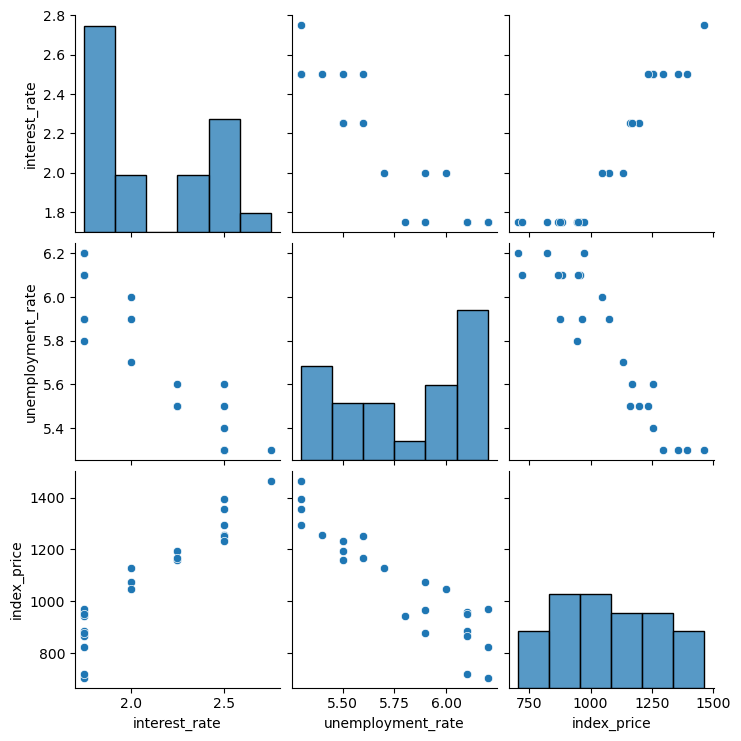

In [112]:
sns.pairplot(df_index)
plt.show()

In [113]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


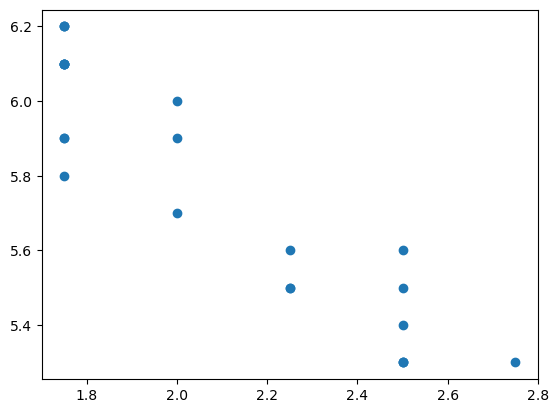

In [114]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'])
plt.show()

In [115]:
df_index.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

In [116]:
X=df_index[['interest_rate', 'unemployment_rate']]
y=df_index['index_price']

In [117]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [118]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

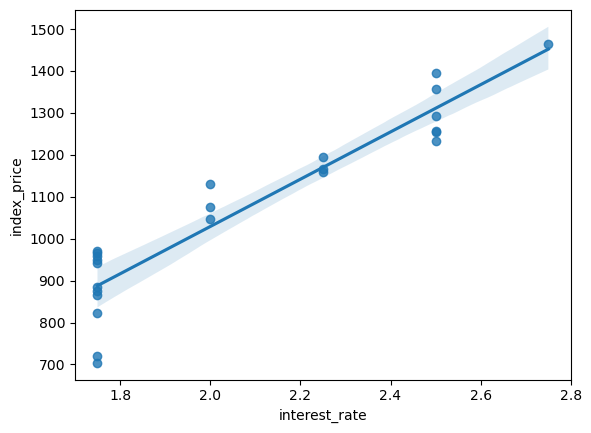

In [120]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])
plt.show()

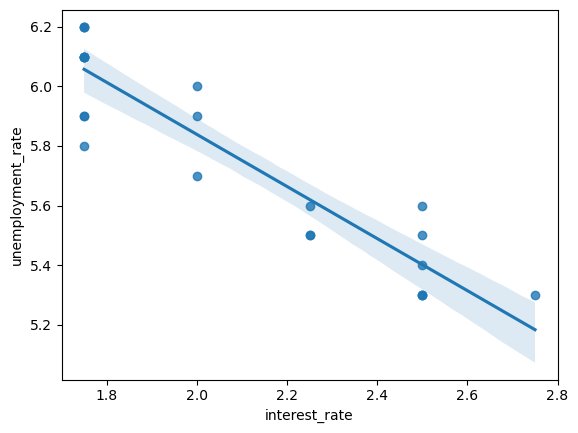

In [121]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])
plt.show()

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler=StandardScaler()

In [124]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
regression=LinearRegression()

In [127]:
regression.fit(X_train,y_train)

LinearRegression()

In [157]:
regression.coef_

array([  88.27275507, -116.25716066])

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [130]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [134]:
y_pred=regression.predict(X_test)

In [135]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [136]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [137]:
mse

5793.76288771258

In [138]:
mae

59.93578152323556

In [139]:
rmse

76.11677139574813

In [140]:
score=r2_score(y_test,y_pred)

In [141]:
score

0.8278978091457142

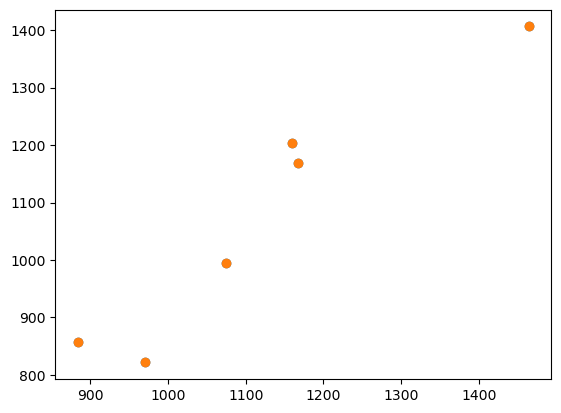

In [143]:
plt.scatter(y_test,y_pred)
plt.show()

In [148]:
residuals=y_test-y_pred

In [149]:
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

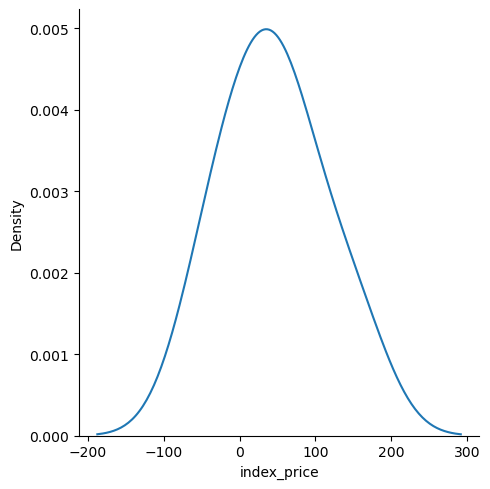

In [150]:
sns.displot(residuals,kind='kde')
plt.show()

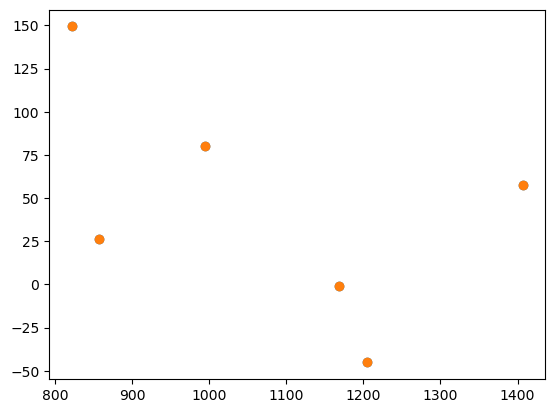

In [152]:
plt.scatter(y_pred,residuals)
plt.show()

In [153]:
import statsmodels.api as sm

In [154]:
model=sm.OLS(y_train,X_train).fit()

In [155]:
prediction=model.predict(X_test)
prediction

array([ 150.78325954, -231.79392541,  353.06855924, -195.73554836,
        -58.53452146,  114.72488249])

In [156]:
model.summary()

/home/nithin/miniconda3/envs/ml/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 22 Oct 2024   Prob (F-statistic):                       0.754
Time:                        00:42:46   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""